In [2]:
import numpy as np #библиотека для работы с n-мерными массивами, линейной алгеброй, статистикой и т.д.
import matplotlib.pyplot as plt #для отрисовки графиков и диаграмм
import pandas as pd #библиотека для обработки и анализа данных
from sklearn.linear_model import LinearRegression #импорт функции линейной регрессии
from sklearn.tree import DecisionTreeRegressor #импорт функции обучения дерева решений
from sklearn.metrics import mean_squared_error #импорт функции средней суммы квадратов отклонений

data = pd.read_csv('EventsByTimes') #объявляем переменную, в которую записываем табличные данные
data

,Id,DateTime,SumEventByTime,SumMedium,SumHigh
0,1198782,2022-09-09 16:13:33.254398,271,2,0
1,1198783,2022-09-09 16:14:33.245376,291,4,0
2,1198784,2022-09-09 16:15:33.257618,349,1,0
3,1198785,2022-09-09 16:16:33.255939,287,4,0
4,1198786,2022-09-09 16:17:33.259167,335,2,0
...,...,...,...,...,...
1247135,1198777,2022-09-09 16:08:33.251708,313,3,0
1247136,1198778,2022-09-09 16:09:33.24986,273,1,0
1247137,1198779,2022-09-09 16:10:33.253967,329,5,0
1247138,1198780,2022-09-09 16:11:33.252432,296,6,0


In [6]:
type(data["DateTime"][0])

str

In [7]:
type(data)

pandas.core.frame.DataFrame

In [19]:
#отсортируем строки по полю Id
data_sorted = data.sort_values(by='Id')
data_sorted["DateTime"] = pd.to_datetime(data_sorted["DateTime"]) 
print(type(data_sorted))
print(type(data_sorted["DateTime"][1]))

data_sorted



<class 'pandas.core.frame.DataFrame'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Id,DateTime,SumEventByTime,SumMedium,SumHigh
48455,1,2019-11-28 18:45:45.457929,0,0,0
48456,2,2019-11-28 18:45:48.605591,482,0,0
48457,3,2019-11-28 18:46:48.518908,363,0,0
48458,4,2019-11-28 18:47:48.466795,371,0,0
48459,5,2019-11-28 18:48:48.431212,342,0,0
...,...,...,...,...,...
48450,1247294,2022-10-17 13:01:50.995897,197,3,0
48451,1247295,2022-10-17 13:02:50.994140,248,6,0
48452,1247296,2022-10-17 13:03:50.991127,254,7,0
48453,1247297,2022-10-17 13:04:50.989884,173,4,0


In [10]:
print(data.equals(data_sorted))
data

False


,Id,DateTime,SumEventByTime,SumMedium,SumHigh
0,1198782,2022-09-09 16:13:33.254398,271,2,0
1,1198783,2022-09-09 16:14:33.245376,291,4,0
2,1198784,2022-09-09 16:15:33.257618,349,1,0
3,1198785,2022-09-09 16:16:33.255939,287,4,0
4,1198786,2022-09-09 16:17:33.259167,335,2,0
...,...,...,...,...,...
1247135,1198777,2022-09-09 16:08:33.251708,313,3,0
1247136,1198778,2022-09-09 16:09:33.24986,273,1,0
1247137,1198779,2022-09-09 16:10:33.253967,329,5,0
1247138,1198780,2022-09-09 16:11:33.252432,296,6,0


In [71]:
from datetime import timedelta

ds = pd.Series(pd.date_range("2019", "2023", freq="D", name="date"))


df = pd.DataFrame(ds)
df["sum"] = 0
print(type(df))
x = 0 
for item in df["date"]:
    data2 = data_sorted[data_sorted['DateTime'].between(item, item + timedelta(1))]
    sum = data2["SumEventByTime"].sum()
    df["sum"][x]= sum
    x = x+1
    
df

<class 'pandas.core.frame.DataFrame'>


C:\Users\teacher\AppData\Local\Temp\ipykernel_10620\2763636844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sum"][x]= sum


,date,sum
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0
...,...,...
1457,2022-12-28,0
1458,2022-12-29,0
1459,2022-12-30,0
1460,2022-12-31,0


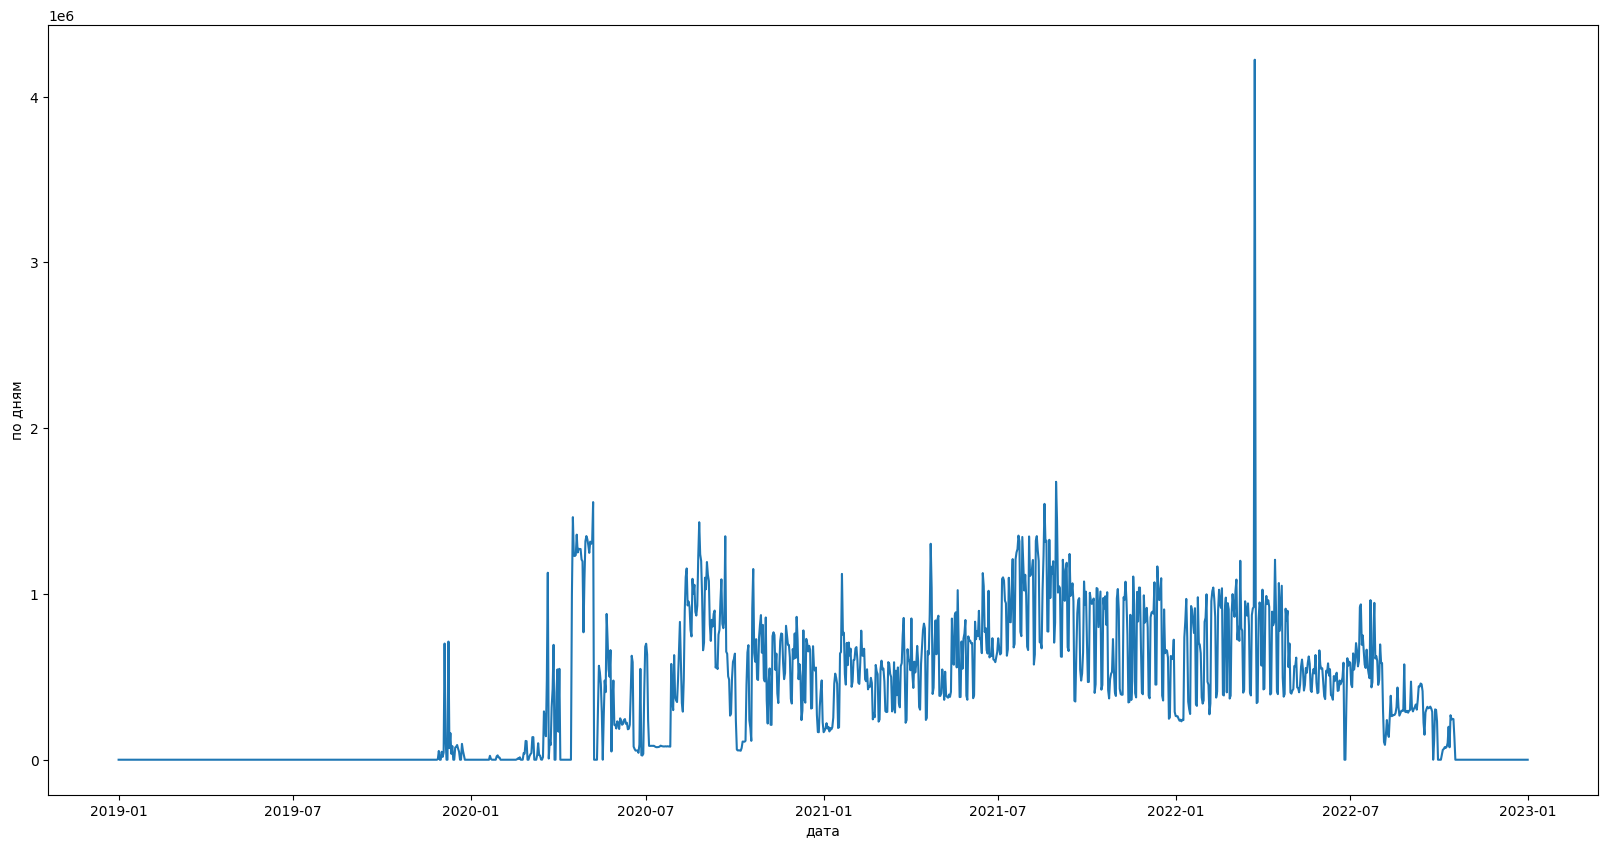

In [72]:
plt.figure(figsize=(20,10))
plt.plot(df["date"], df["sum"])
plt.ylabel('по дням')
plt.xlabel('дата')
plt.show()

In [ ]:
x = data_sorted['DateTime']
y = data_sorted['SumEventByTime']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.ylabel('дата')
plt.xlabel('Id')
plt.show()

C:\Users\teacher\AppData\Local\Temp\ipykernel_10620\1152362704.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  short_data_sorted = short_data_sorted[condition2]


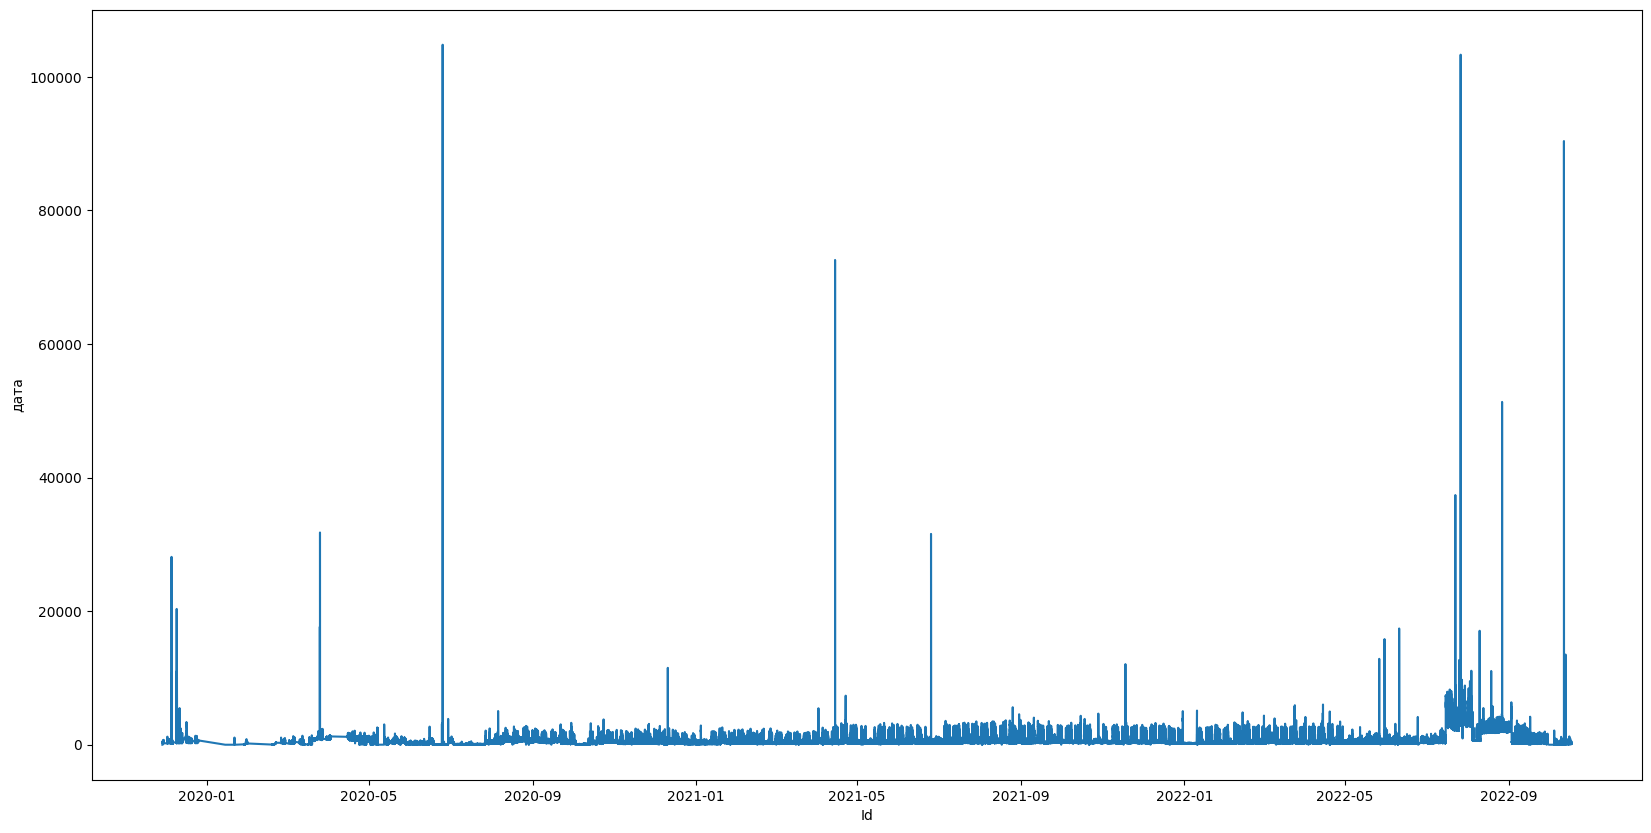

In [20]:
#проверим правильность сортировки по ключу Id, построив линейный график за один год
condition1 = data_sorted['DateTime'] < '2019-12-31'
condition2 = data_sorted['DateTime'] > '2019-11-30'
short_data_sorted = data_sorted[condition1]
short_data_sorted = short_data_sorted[condition2]
short_data_sorted
x = data_sorted['DateTime']
y = data_sorted['SumEventByTime']

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.ylabel('дата')
plt.xlabel('Id')
plt.show()

In [44]:
conditionA = data_sorted['Id'].isna()
conditionB = data_sorted['DateTime'].isna()

conditionA
conditionB

48455    False
48456    False
48457    False
48458    False
48459    False
         ...  
48450    False
48451    False
48452    False
48453    False
48454    False
Name: DateTime, Length: 1247140, dtype: bool

In [45]:
print(data_sorted[conditionA])
print(data_sorted[conditionB])

Empty DataFrame
Columns: [Id, DateTime, SumEventByTime, SumMedium, SumHigh]
Index: []
Empty DataFrame
Columns: [Id, DateTime, SumEventByTime, SumMedium, SumHigh]
Index: []
